### Imports
- - -

In [31]:
# Import calibration Framework
from pycaleva import CalibrationEvaluator

# Import libraries related to Model creation
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Load Breast Cancer Dataset
- - -
This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

In [32]:
data = pd.read_csv('./Breast_cancer_data.csv')
data.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
282,19.40,18.18,127.20,1145.0,0.104,0
403,12.94,16.17,83.18,507.6,0.099,1
495,14.87,20.21,96.12,680.9,0.096,1
73,13.80,15.79,90.43,584.1,0.101,0
45,18.65,17.60,123.70,1076.0,0.110,0


In [33]:
# Split into trainingset and testset --> EXTERNAL EVALUATION
X_train, X_test, y_train, y_test = train_test_split(data.drop(["diagnosis"], axis=1), data.diagnosis, test_size=.3, random_state=13)

### Assess model fit using Framework - **Well calibrated** model
- - -

In [34]:
# Train a logistic regression model on data
clf = LogisticRegression(random_state=3)
clf.fit(X_train, y_train)
pred_prob = clf.predict_proba(X_test)[:,1]

In [35]:
# Initialze Calibration Framework
ce = CalibrationEvaluator(y_test, pred_prob, outsample=True, n_groups='auto')

- Get Metrics:

In [36]:
ce.metrics()

metrics_result(auroc=0.9739811912225705, brier=0.2677083794415594, ace=0.0361775962446639, mce=0.1837227304691177, awlc=0.041443052220213474)

- Apply Hosmer Lemeshow Test and Pigeon Heyse Test:

In [37]:
ce.hosmerlemeshow()

,Interval,total,mean_predicted,mean_observed,observed_1,predicted_1
0,"(-0.00099843, 0.0114]",19,0.003,0.000,0,0.054
1,"(0.0114, 0.116]",19,0.042,0.000,0,0.807
2,"(0.116, 0.506]",19,0.290,0.474,9,5.509
3,"(0.506, 0.853]",19,0.719,0.737,14,13.667
4,"(0.853, 0.942]",19,0.907,0.947,18,17.230
5,"(0.942, 0.974]",19,0.961,0.947,18,18.265
6,"(0.974, 0.989]",19,0.983,1.000,19,18.682
7,"(0.989, 0.997]",19,0.993,1.000,19,18.872
8,"(0.997, 1.0]",19,0.999,1.000,19,18.980


Warning! Some expected frequencies are smaller then 1. Possible violoation of chi²-distribution.
C(9): 4.98 p-value: 0.836


hltest_result(statistic=4.982635477424991, pvalue=0.8358193332183672, dof=9)

In [38]:
ce.pigeonheyse()

,Interval,total,mean_predicted,mean_observed,phi,observed_1,predicted_1
0,"(-0.00099843, 0.0114]",19,0.003,0.000,0.995,0,0.054
1,"(0.0114, 0.116]",19,0.042,0.000,0.980,0,0.807
2,"(0.116, 0.506]",19,0.290,0.474,0.922,9,5.509
3,"(0.506, 0.853]",19,0.719,0.737,0.939,14,13.667
4,"(0.853, 0.942]",19,0.907,0.947,0.993,18,17.230
5,"(0.942, 0.974]",19,0.961,0.947,0.998,18,18.265
6,"(0.974, 0.989]",19,0.983,1.000,0.999,19,18.682
7,"(0.989, 0.997]",19,0.993,1.000,0.999,19,18.872
8,"(0.997, 1.0]",19,0.999,1.000,0.999,19,18.980


Warning! Some expected frequencies are smaller then 1. Possible violoation of chi²-distribution.
J²(9): 5.27 p-value: 0.810


phtest_result(statistic=5.269600396341568, pvalue=0.8102017228852412, dof=9)

- Apply z-Test

In [39]:
ce.z_test()

ztest_result(statistic=-0.21590257919669287, pvalue=0.829063686607032)

- Draw the calibration plot

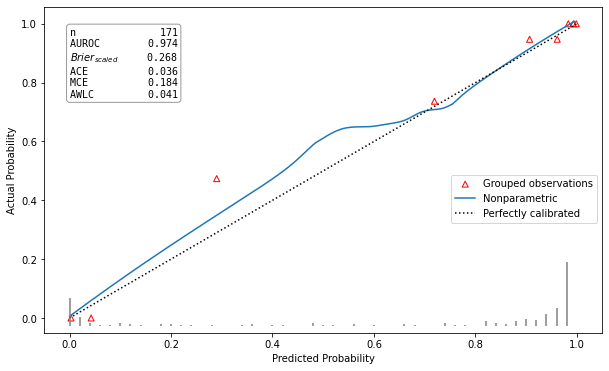

In [40]:
ce.calibration_plot();

- Draw the calibration belt

100%|██████████| 50/50 [00:01<00:00, 25.43it/s]


calbelt_result(statistic=1.6111330037643796, pvalue=0.4468347221346196, fig=<Figure size 720x432 with 1 Axes>)

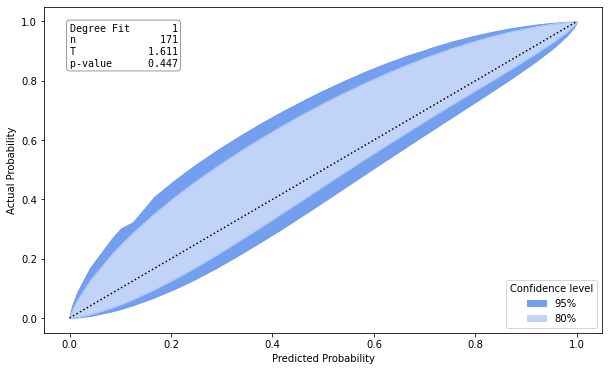

In [41]:
ce.calbelt(plot=True)

- Create calibration report for the model

In [42]:
ce.calibration_report('report_well.pdf', 'my_log_reg1')

100%|██████████| 50/50 [00:02<00:00, 24.85it/s]


Calibration report for model 'my_log_reg1' saved to report_well.pdf


### Assess model fit using Framework - **Poorly calibrated** model
- - -
*NOTE:* The number of iterations of the logistic regression solver were limited in order to produce a poorly calibrated model

In [43]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    # Ignore warning issued due to limitation of iterations
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    # Train a poorly calibrated logistic regression model on data
    clf2 = LogisticRegression(random_state=2, max_iter=5) # --> Limited number of iterations
    clf2.fit(X_train, y_train)
    pred_prob = clf2.predict_proba(X_test)[:,1]

In [44]:
# Initialze Calibration Framework
ce = CalibrationEvaluator(y_test, pred_prob, outsample=True, n_groups='auto')

- Get Metrics

In [45]:
ce.metrics()

metrics_result(auroc=0.923510971786834, brier=0.4678974105585157, ace=0.14236904925295432, mce=0.26342217828393727, awlc=0.1487193366022463)

- Apply Hosmer Lemeshow Test and Pigeon Heyse Test:

In [46]:
ce.hosmerlemeshow()

,Interval,total,mean_predicted,mean_observed,observed_1,predicted_1
0,"(-0.0009678, 0.053]",19,0.022,0.000,0,0.418
1,"(0.053, 0.229]",19,0.112,0.105,2,2.136
2,"(0.229, 0.512]",19,0.368,0.632,12,6.995
3,"(0.512, 0.622]",19,0.575,0.789,15,10.934
4,"(0.622, 0.675]",19,0.651,0.684,13,12.365
5,"(0.675, 0.733]",19,0.705,0.947,18,13.394
6,"(0.733, 0.783]",19,0.762,1.000,19,14.480
7,"(0.783, 0.846]",19,0.818,1.000,19,15.534
8,"(0.846, 0.909]",19,0.869,0.947,18,16.508


Warning! Some expected frequencies are smaller then 1. Possible violoation of chi²-distribution.
C(9): 26.33 p-value: 0.002


hltest_result(statistic=26.32792475118742, pvalue=0.0018051545107069522, dof=9)

In [47]:
ce.pigeonheyse()

,Interval,total,mean_predicted,mean_observed,phi,observed_1,predicted_1
0,"(-0.0009678, 0.053]",19,0.022,0.000,0.991,0,0.418
1,"(0.053, 0.229]",19,0.112,0.105,0.975,2,2.136
2,"(0.229, 0.512]",19,0.368,0.632,0.965,12,6.995
3,"(0.512, 0.622]",19,0.575,0.789,0.994,15,10.934
4,"(0.622, 0.675]",19,0.651,0.684,0.999,13,12.365
5,"(0.675, 0.733]",19,0.705,0.947,0.998,18,13.394
6,"(0.733, 0.783]",19,0.762,1.000,0.999,19,14.480
7,"(0.783, 0.846]",19,0.818,1.000,0.998,19,15.534
8,"(0.846, 0.909]",19,0.869,0.947,0.997,18,16.508


Warning! Some expected frequencies are smaller then 1. Possible violoation of chi²-distribution.
J²(9): 26.59 p-value: 0.002


phtest_result(statistic=26.587540158176804, pvalue=0.0016361413219523335, dof=9)

- Apply z-Test

In [48]:
ce.z_test()

ztest_result(statistic=-3.196125145498827, pvalue=0.0013928668407116645)

- Draw the calibration plot

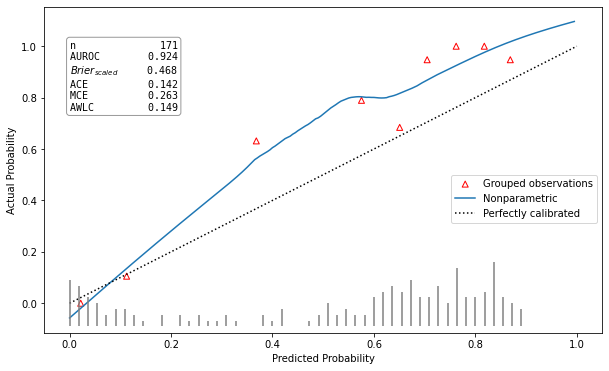

In [49]:
ce.calibration_plot();

- Draw the calibration belt

100%|██████████| 50/50 [00:01<00:00, 27.20it/s]


calbelt_result(statistic=27.508984722706913, pvalue=1.062918255523293e-06, fig=<Figure size 720x432 with 1 Axes>)

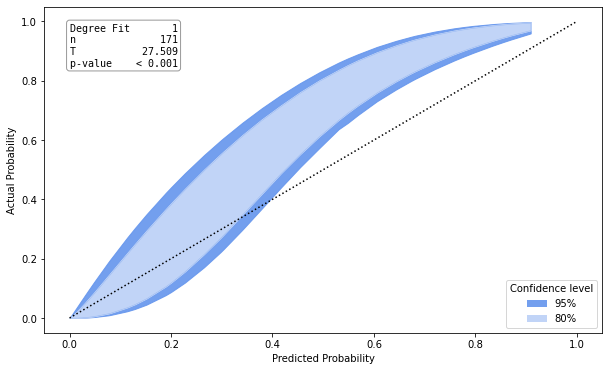

In [50]:
ce.calbelt(plot=True)

In [51]:
ce.calibration_report('report_poorly.pdf', 'my_log_reg2')

100%|██████████| 50/50 [00:01<00:00, 27.08it/s]


Calibration report for model 'my_log_reg2' saved to report_poorly.pdf
